In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


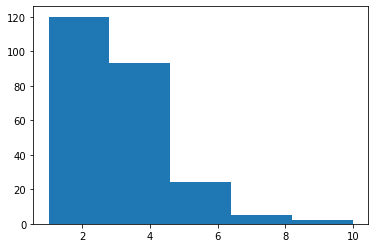

In [8]:
plt.hist(df.tip,bins= 5);

{'whiskers': [<matplotlib.lines.Line2D at 0x2075ae09ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x2075ae1e1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2075ae09760>],
 'medians': [<matplotlib.lines.Line2D at 0x2075ae1e880>],
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x2075ae1ebe0>]}

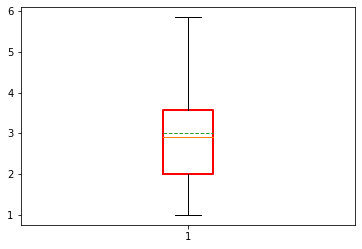

In [17]:
prop = { 'color':'red','linewidth':'2'}
plt.boxplot(df.tip,showfliers=False,
           showmeans= True,
            meanline = True,boxprops=prop)

In [25]:
daywise_smokerbill = pd.pivot_table(data=df,index='day',
              values='total_bill',columns=df.smoker,aggfunc = sum)
daywise_smokerbill

smoker,Yes,No
day,,
Thur,326.24,770.09
Fri,252.20,73.68
Sat,893.62,884.78
Sun,458.28,1168.88


In [26]:
daywise_smokerbill.index

CategoricalIndex(['Thur', 'Fri', 'Sat', 'Sun'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, name='day', dtype='category')

In [27]:
daywise_smokerbill.columns

CategoricalIndex(['Yes', 'No'], categories=['Yes', 'No'], ordered=False, name='smoker', dtype='category')

<AxesSubplot:ylabel='day'>

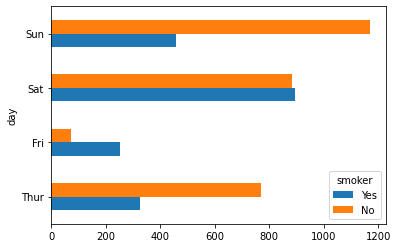

In [30]:
 daywise_smokerbill.plot(kind='barh')

Text(0, 0.5, 'Bill')

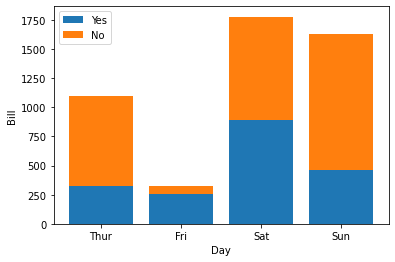

In [33]:
ax = plt.subplot()
ax.bar(daywise_smokerbill.index,
      daywise_smokerbill['Yes'])
ax.bar(daywise_smokerbill.index,
      daywise_smokerbill['No'],
      bottom=daywise_smokerbill['Yes'])
ax.legend(daywise_smokerbill.columns)
ax.set_xlabel('Day')
ax.set_ylabel('Bill')

# GenderWise DayWise Bill

In [34]:
genderwise_daybill = pd.pivot_table(data=df,
                                   index='sex',columns='day',
                                   values='total_bill',aggfunc='sum')

In [35]:
genderwise_daybill

day,Thur,Fri,Sat,Sun
sex,,,,
Male,561.44,198.57,1227.35,1269.46
Female,534.89,127.31,551.05,357.70


<AxesSubplot:xlabel='sex'>

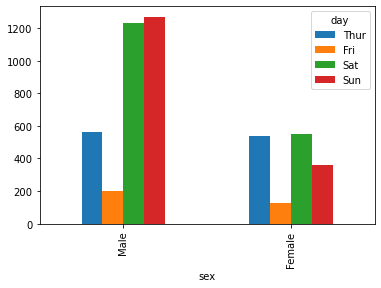

In [36]:
genderwise_daybill.plot(kind='bar')

Text(0, 0.5, 'Bill')

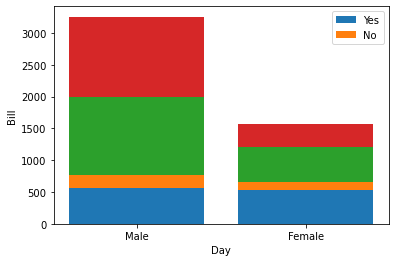

In [37]:
ax = plt.subplot()
ax.bar(genderwise_daybill.index,
      genderwise_daybill['Thur'])
ax.bar(genderwise_daybill.index,
      genderwise_daybill['Fri'],
      bottom=genderwise_daybill['Thur'])
ax.bar(genderwise_daybill.index,
      genderwise_daybill['Sat'],
      bottom=np.array( genderwise_daybill['Thur'] +  genderwise_daybill['Fri']) )
ax.bar(genderwise_daybill.index,
      genderwise_daybill['Sun'],
      bottom=np.array( genderwise_daybill['Thur'] +  genderwise_daybill['Fri'] + genderwise_daybill['Sat']) )
ax.legend(daywise_smokerbill.columns)
ax.set_xlabel('Day')
ax.set_ylabel('Bill')

# MultiLine Graph

In [41]:
male = df.loc[df.sex == 'Male'].groupby('day')['total_bill'].sum()

In [42]:
male

day
Thur     561.44
Fri      198.57
Sat     1227.35
Sun     1269.46
Name: total_bill, dtype: float64

In [43]:
female = df.loc[df.sex == 'Female'].groupby('day')['total_bill'].sum()

In [44]:
female

day
Thur    534.89
Fri     127.31
Sat     551.05
Sun     357.70
Name: total_bill, dtype: float64

Text(0, 0.5, 'Total Bill')

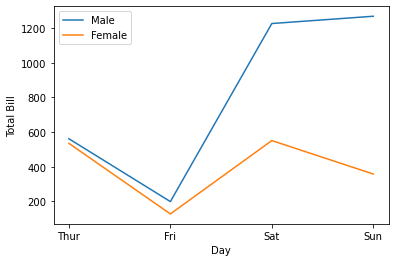

In [49]:
plt.plot(male)
plt.plot(female)
plt.legend(['Male','Female'])
plt.xlabel('Day')
plt.ylabel('Total Bill')